In [1]:
import numpy as np # linear algerbra
import pandas as pd # data processing
import matplotlib.pyplot as plt # plotting
import seaborn as sns # plotting
import json # data processing(.json)

from sklearn.preprocessing import LabelEncoder # Creates placeholders for categorical variables
from sklearn.feature_extraction.text import CountVectorizer # converts text into vector matrix
from sklearn.model_selection import train_test_split # split data into training and testing sets
from sklearn.naive_bayes import MultinomialNB # ML model for naive bayes
from sklearn.metrics import accuracy_score, confusion_matrix # measure the accuracy of the model
from sklearn.metrics import classification_report # classification report of the model
 

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

In [2]:
df=pd.read_csv(r"dataset.csv")
df.Text=df.Text.str.lower()

In [3]:
df

,Text,language
0,klement gottwaldi surnukeha palsameeriti ning ...,Estonian
1,sebes joseph pereira thomas på eng the jesuit...,Swedish
2,ถนนเจริญกรุง อักษรโรมัน thanon charoen krung เ...,Thai
3,விசாகப்பட்டினம் தமிழ்ச்சங்கத்தை இந்துப் பத்திர...,Tamil
4,de spons behoort tot het geslacht haliclona en...,Dutch
...,...,...
21995,hors du terrain les années et sont des année...,French
21996,ใน พศ หลักจากที่เสด็จประพาสแหลมมลายู ชวา อินเ...,Thai
21997,con motivo de la celebración del septuagésimoq...,Spanish
21998,年月，當時還只有歲的她在美國出道，以mai-k名義推出首張英文《baby i like》，由...,Chinese


In [4]:
df.language.unique()

array(['Estonian', 'Swedish', 'Thai', 'Tamil', 'Dutch', 'Japanese',
       'Turkish', 'Latin', 'Urdu', 'Indonesian', 'Portugese', 'French',
       'Chinese', 'Korean', 'Hindi', 'Spanish', 'Pushto', 'Persian',
       'Romanian', 'Russian', 'English', 'Arabic'], dtype=object)

In [5]:
df.columns[2:]

Index([], dtype='object')

In [6]:
for language in df.language.unique():
    mask=df.language==language
    LangDf=df[mask]
    cv = CountVectorizer()
    ouput=cv.fit_transform(LangDf.Text)
    Words = cv.get_feature_names_out()
    Freq = ouput.toarray().sum(axis=0)
    TopNwords=pd.DataFrame({"Words":Words,"Freq":Freq}).sort_values(by="Freq",ascending=False)[:20].Words.to_list()
    df=pd.concat([df, pd.DataFrame(columns=TopNwords)])



In [7]:
import re
for word in df.columns[2:]:
    df[word] = df.Text.apply(lambda x: 1 if re.findall(rf'\b{word}\b',x) else 0)

In [8]:
df.iloc[:,2:]

,ja,on,ta,oli,ning,aastal,ka,mis,kui,või,...,مع,بعد,كان,الذي,بين,ذلك,هذه,هو,هذا,لا
0,1,0,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["language"]=le.fit_transform(df["language"])

decoded_languages = le.inverse_transform(df["language"])
df["decoded_language"] = decoded_languages
unique_decoded_languages = sorted(df["decoded_language"].unique())
unique_languages = sorted(df["language"].unique())

print("======================================================================================================================")
print("Unique Decoded Languages (Ascending Order):", unique_decoded_languages)
print("======================================================================================================================")
print("Unique Languages (Ascending Order):", unique_languages)
print("======================================================================================================================")

Unique Decoded Languages (Ascending Order): ['Arabic', 'Chinese', 'Dutch', 'English', 'Estonian', 'French', 'Hindi', 'Indonesian', 'Japanese', 'Korean', 'Latin', 'Persian', 'Portugese', 'Pushto', 'Romanian', 'Russian', 'Spanish', 'Swedish', 'Tamil', 'Thai', 'Turkish', 'Urdu']
Unique Languages (Ascending Order): [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17836\3382329257.py:6: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df["decoded_language"] = decoded_languages


In [10]:
df["language"]

0         4
1        17
2        19
3        18
4         2
         ..
21995     5
21996    19
21997    16
21998     1
21999    14
Name: language, Length: 22000, dtype: int32

In [11]:
X =  df.iloc[:,2:-1]
y=df["language"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42,stratify=y)

In [20]:
NB_model = MultinomialNB()
NB_model.fit(X_train, y_train)
y_pred = NB_model.predict(X_test)
print("MultinomialNB Acc:",accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

MultinomialNB Acc: 0.8988636363636363
              precision    recall  f1-score   support

           0       0.38      1.00      0.55       200
           1       0.91      0.30      0.45       200
           2       0.98      0.97      0.98       200
           3       0.75      0.99      0.85       200
           4       0.99      0.94      0.97       200
           5       0.94      0.98      0.96       200
           6       1.00      0.96      0.98       200
           7       1.00      0.96      0.98       200
           8       0.99      0.34      0.51       200
           9       1.00      0.84      0.91       200
          10       0.98      0.93      0.95       200
          11       0.99      0.99      0.99       200
          12       0.97      0.95      0.96       200
          13       0.99      0.95      0.97       200
          14       0.97      0.98      0.98       200
          15       0.99      0.90      0.94       200
          16       0.97      0.96      0.97

In [21]:
model=LogisticRegression(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Logistic Regression Accuracy: ", accuracy_score(y_test, y_pred))
print(classification_report(y_test,y_pred))

Logistic Regression Accuracy:  0.9272727272727272
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       200
           1       0.45      0.98      0.62       200
           2       0.99      0.99      0.99       200
           3       0.84      0.95      0.89       200
           4       0.97      0.94      0.95       200
           5       0.97      0.97      0.97       200
           6       1.00      0.96      0.98       200
           7       1.00      0.95      0.97       200
           8       0.83      0.36      0.51       200
           9       1.00      0.85      0.92       200
          10       0.98      0.94      0.96       200
          11       0.99      0.98      0.99       200
          12       0.94      0.95      0.95       200
          13       1.00      0.94      0.97       200
          14       1.00      0.97      0.98       200
          15       0.99      0.90      0.94       200
          16       0.99      0.

In [22]:
from sklearn.svm import LinearSVC

classifier = LinearSVC(random_state=42) # instantiate a logistic regression model
classifier.fit(X_train, y_train) # fit the model with training data

# Make predictions on test data

y_pred_class = classifier.predict(X_test)

print("Linear SVC Accuracy: ", accuracy_score(y_test, y_pred_class))
print(classification_report(y_test,y_pred))

Linear SVC Accuracy:  0.9304545454545454
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       200
           1       0.45      0.98      0.62       200
           2       0.99      0.99      0.99       200
           3       0.84      0.95      0.89       200
           4       0.97      0.94      0.95       200
           5       0.97      0.97      0.97       200
           6       1.00      0.96      0.98       200
           7       1.00      0.95      0.97       200
           8       0.83      0.36      0.51       200
           9       1.00      0.85      0.92       200
          10       0.98      0.94      0.96       200
          11       0.99      0.98      0.99       200
          12       0.94      0.95      0.95       200
          13       1.00      0.94      0.97       200
          14       1.00      0.97      0.98       200
          15       0.99      0.90      0.94       200
          16       0.99      0.96      0

In [23]:
rf_classifier = RandomForestClassifier(random_state=42)

# Fit the model with training data
rf_classifier.fit(X_train, y_train)

# Make predictions on test data
y_pred_class_rf = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_class_rf)
print("Random Forest Accuracy:", accuracy_rf)
print(classification_report(y_test,y_pred))

Random Forest Accuracy: 0.928409090909091
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       200
           1       0.45      0.98      0.62       200
           2       0.99      0.99      0.99       200
           3       0.84      0.95      0.89       200
           4       0.97      0.94      0.95       200
           5       0.97      0.97      0.97       200
           6       1.00      0.96      0.98       200
           7       1.00      0.95      0.97       200
           8       0.83      0.36      0.51       200
           9       1.00      0.85      0.92       200
          10       0.98      0.94      0.96       200
          11       0.99      0.98      0.99       200
          12       0.94      0.95      0.95       200
          13       1.00      0.94      0.97       200
          14       1.00      0.97      0.98       200
          15       0.99      0.90      0.94       200
          16       0.99      0.96      

Confusion Matrix:


<AxesSubplot: >

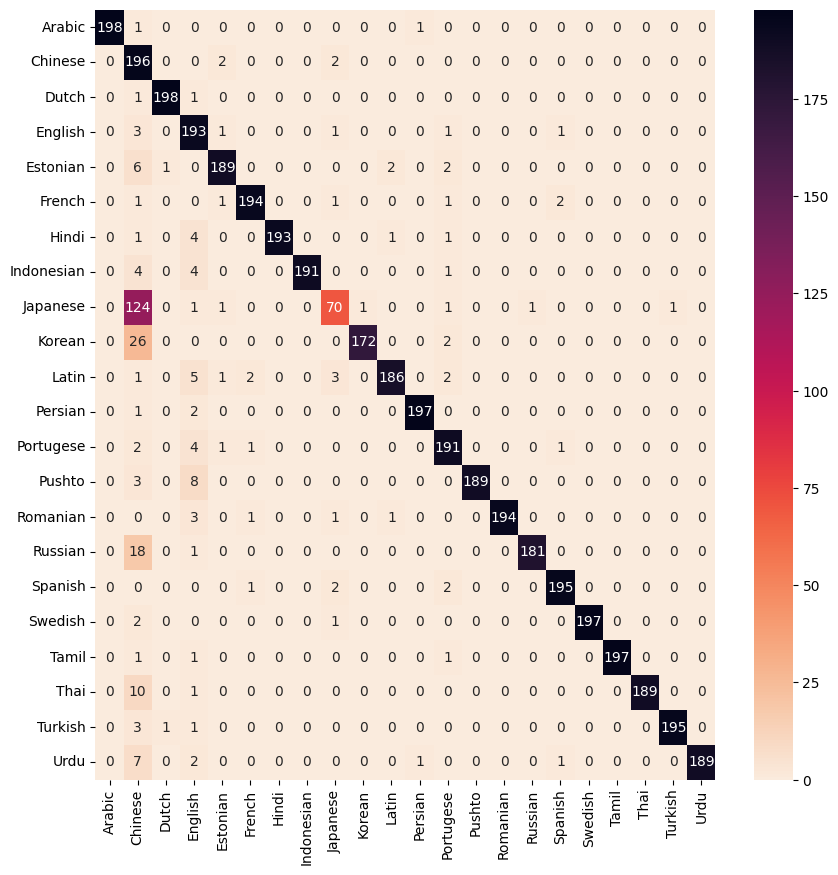

In [16]:
conf_matrix = confusion_matrix(y_test, y_pred_class)
print("Confusion Matrix:")
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(conf_matrix,xticklabels=unique_decoded_languages,yticklabels=unique_decoded_languages, cmap='rocket_r', linecolor='white',annot=True,fmt='d')


In [17]:
test_inputs = [
    'Esse é um dia muito especial para uma pessoa bem importante', # Portugese
    'This is a very special day for a very important person', # English
    'Det här är en väldigt speciell dag för en mycket viktig person', # Swedish
    'See on väga eriline päev väga tähtsa inimese jaoks', # Estonian
    'یہ ایک بہت ہی اہم شخص کے لیے بہت خاص دن ہے۔', # Urdu
    '對於一個非常重要的人來說，這是非常特別的一天', # Chinese
    'Este es un día muy especial para una persona muy importante.', # Spanish
]

In [18]:
sent =   'மிக முக்கியமான நபருக்கு இது மிகவும் சிறப்பான நாள்'
arr=[]
for i,word in enumerate(df.columns[2:-1]):

    arr.append(1 if re.findall(rf'\b{word}\b',sent) else 0)

ans = classifier.predict(np.array(arr).reshape(1,-1))
unique_decoded_languages[ans[0]]


c:\Users\lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearSVC was fitted with feature names
  warnings.warn(


'Chinese'

In [19]:
arr

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
